In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.shape

(2938, 22)

In [7]:
print(df.columns.tolist())


['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
df1 = df.copy()
df1.columns = df1.columns.str.strip()

# Check available columns
print(df1.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [9]:
df1.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
# Check countries where all Population values are null
all_null_countries = df1.groupby('Country')['Population'].apply(lambda x: x.isna().all()).reset_index()
all_null_countries = all_null_countries[all_null_countries['Population'] == True]

print(all_null_countries)


                                               Country  Population
4                                  Antigua and Barbuda        True
10                                             Bahamas        True
11                                             Bahrain        True
13                                            Barbados        True
19                    Bolivia (Plurinational State of)        True
23                                   Brunei Darussalam        True
37                                               Congo        True
38                                        Cook Islands        True
41                                                Cuba        True
43                                             Czechia        True
44                                       Côte d'Ivoire        True
45               Democratic People's Republic of Korea        True
46                    Democratic Republic of the Congo        True
49                                            Dominica        

In [11]:
# Identify countries where all Population values are null
all_null_countries = df1.groupby('Country')['Population'].apply(lambda x: x.isna().all())
countries_to_remove = all_null_countries[all_null_countries].index

# Remove these countries from df1
df1 = df1[~df1['Country'].isin(countries_to_remove)].reset_index(drop=True)

print("Remaining rows after removing countries with all Population null:", len(df1))


Remaining rows after removing countries with all Population null: 2290


In [12]:
df1.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                      2
Adult Mortality                      2
infant deaths                        0
Alcohol                            157
percentage expenditure               0
Hepatitis B                        482
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  156
Diphtheria                          19
HIV/AIDS                             0
GDP                                 26
Population                           4
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources      1
Schooling                            0
dtype: int64

In [13]:
# Identify countries where all Population values are null
all_null_countries = df1.groupby('Country')['Hepatitis B'].apply(lambda x: x.isna().all())
countries_to_remove = all_null_countries[all_null_countries].index

# Remove these countries from df1
df2 = df1[~df1['Country'].isin(countries_to_remove)].reset_index(drop=True)

print("Remaining rows after removing countries with all Population null:", len(df1))


Remaining rows after removing countries with all Population null: 2290


In [14]:
# Identify countries where all Population values are null
all_null_Alcohol= df2.groupby('Country')['Alcohol'].apply(lambda x: x.isna().all())
countries_to_remove = all_null_Alcohol[all_null_Alcohol].index

# Remove these countries from df1
df1 = df1[~df1['Country'].isin(countries_to_remove)].reset_index(drop=True)

print("Remaining rows after removing countries with all Population null:", len(df1))


Remaining rows after removing countries with all Population null: 2273


In [15]:
# Identify countries where all Population values are null
all_null_thinness1_19_years= df2.groupby('Country')['thinness  1-19 years'].apply(lambda x: x.isna().all())
countries_to_remove = all_null_thinness1_19_years[all_null_thinness1_19_years].index

# Remove these countries from df1
df1 = df1[~df1['Country'].isin(countries_to_remove)].reset_index(drop=True)

print("Remaining rows after removing countries with all Population null:", len(df1))


Remaining rows after removing countries with all Population null: 2257


In [16]:
df1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      1
Adult Mortality                      1
infant deaths                        0
Alcohol                            139
percentage expenditure               0
Hepatitis B                        462
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                8
Total expenditure                  142
Diphtheria                           8
HIV/AIDS                             0
GDP                                 18
Population                           4
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources      1
Schooling                            0
dtype: int64

In [17]:
# For each column with nulls
cols_with_nulls = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 
                   'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 
                   'Income composition of resources']

# Fill missing values per country using the country's mean
for col in cols_with_nulls:
    df1[col] = df1.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

# Check remaining nulls
print(df1.isnull().sum())


Country                              0
Year                                 0
Status                               0
Life expectancy                      1
Adult Mortality                      1
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        128
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                           0
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources      1
Schooling                            0
dtype: int64


In [18]:
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
df1['Status'].dtype


dtype('O')

In [20]:
df1['Status'].unique()


array(['Developing', 'Developed'], dtype=object)

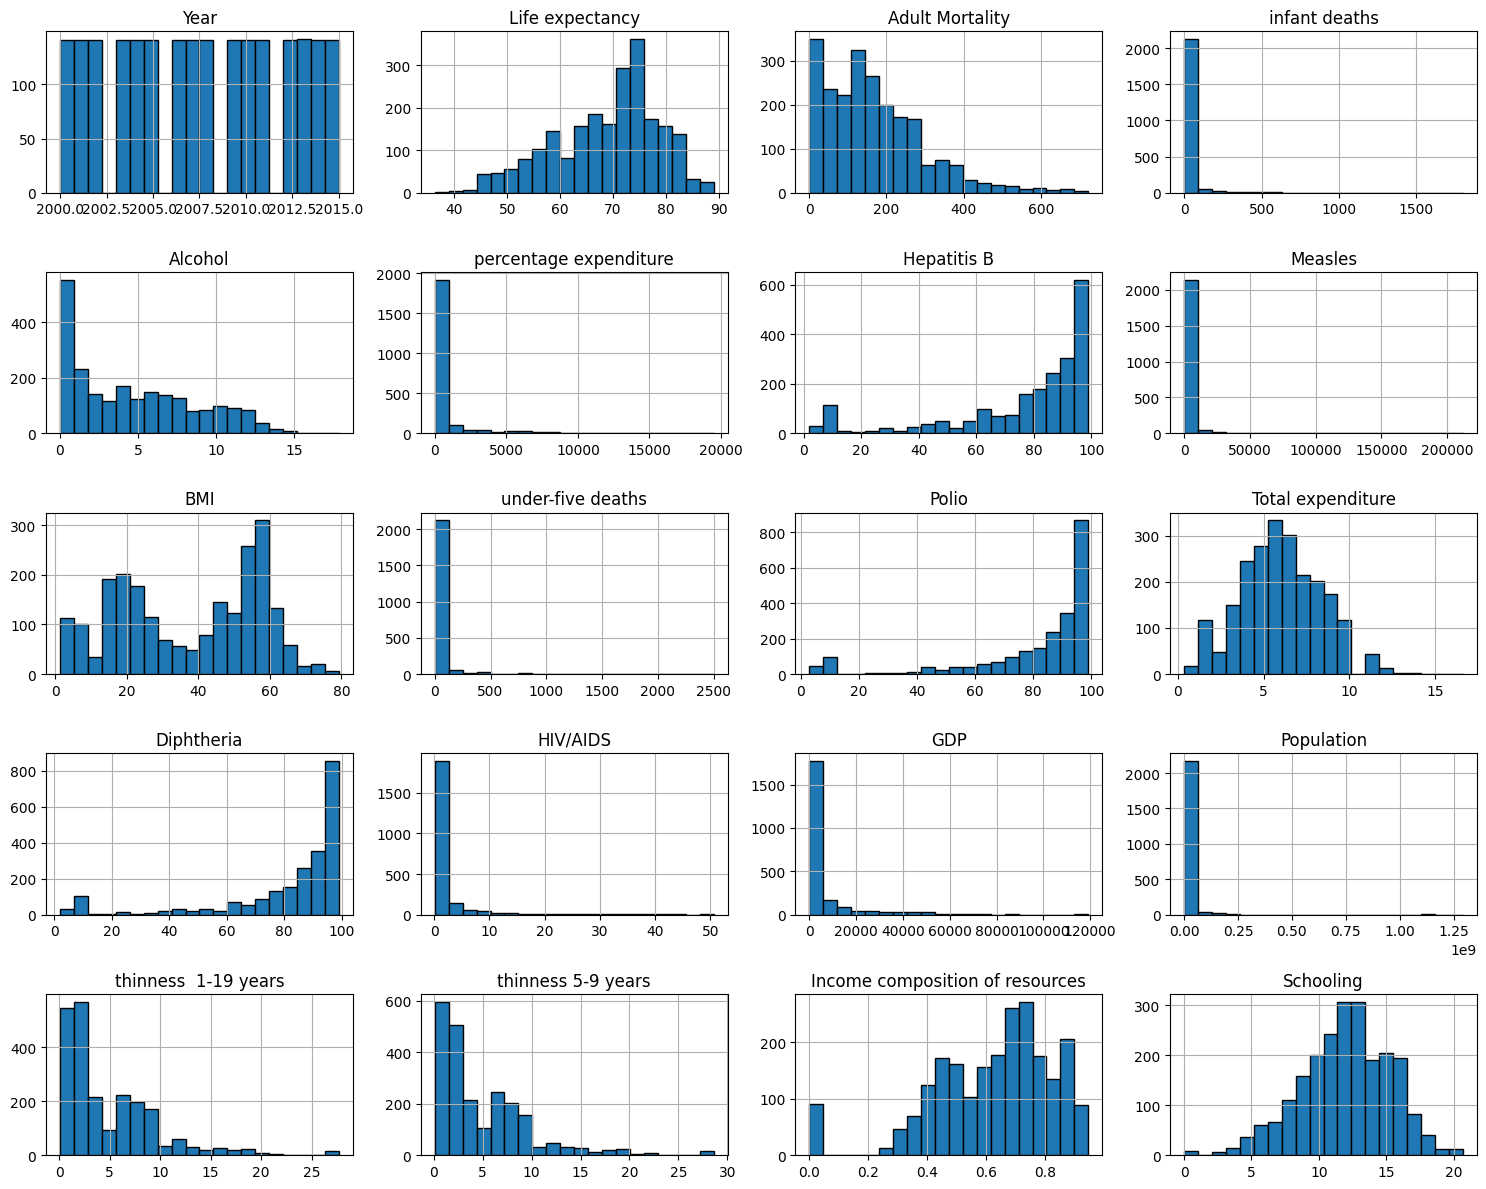

In [21]:
# Select only numerical columns
num_cols = df1.select_dtypes(include=['number']).columns

# Plot histograms
df1[num_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


/tmp/ipykernel_309521/3667879441.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df1[num_cols].hist(ax=axes[0], bins=20, edgecolor='black')


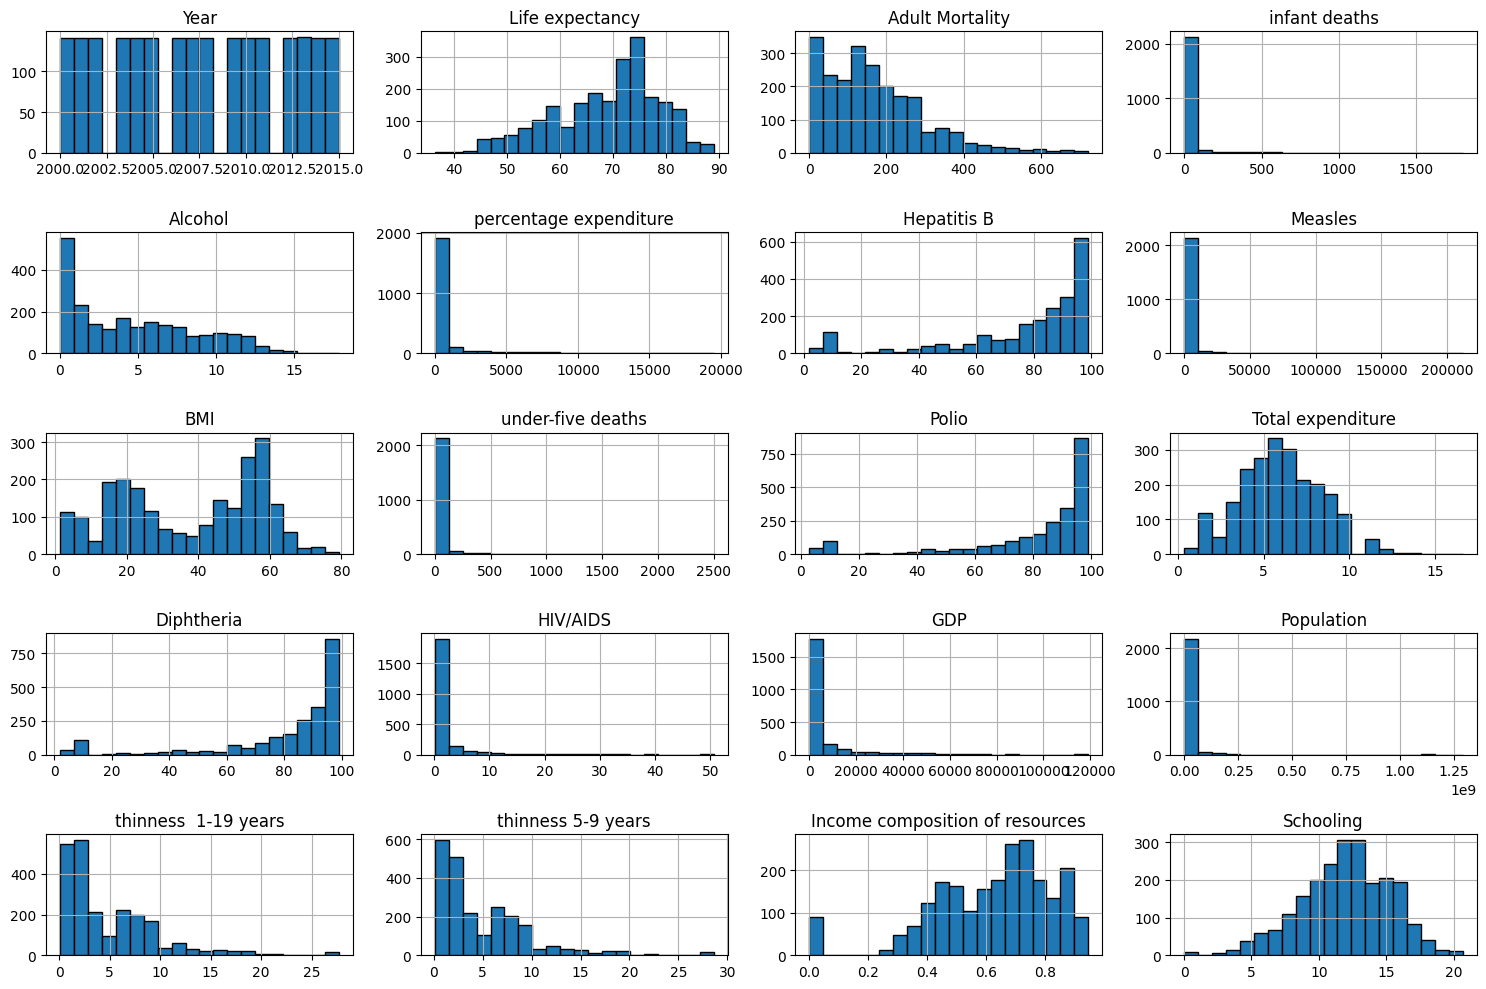

In [22]:
# Select numerical columns
num_cols = df1.select_dtypes(include=['number']).columns

# Create a figure with 2 rows: histograms (top) and boxplots (bottom)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

#  Histograms
df1[num_cols].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title("Histograms of Numerical Columns")

#  Boxplots
df1[num_cols].plot(kind='box', ax=axes[1], vert=False)
axes[1].set_title("Boxplots of Numerical Columns")

plt.tight_layout()
plt.show()


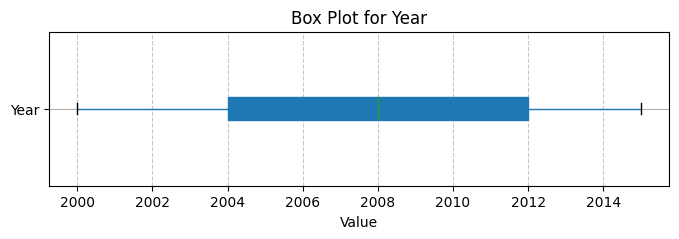

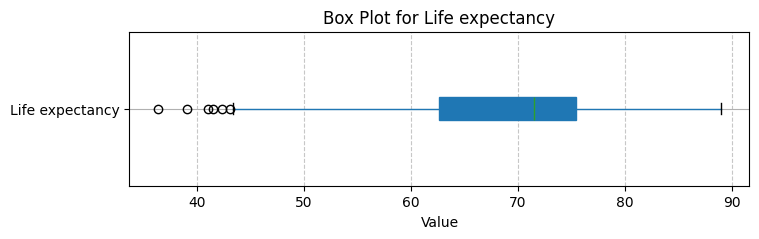

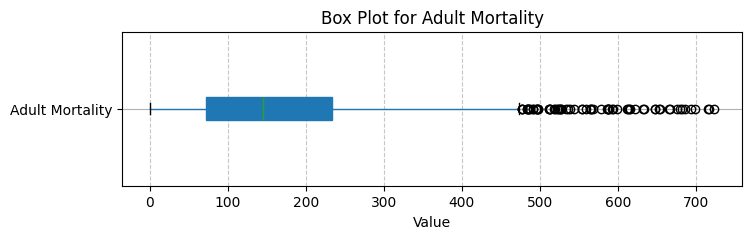

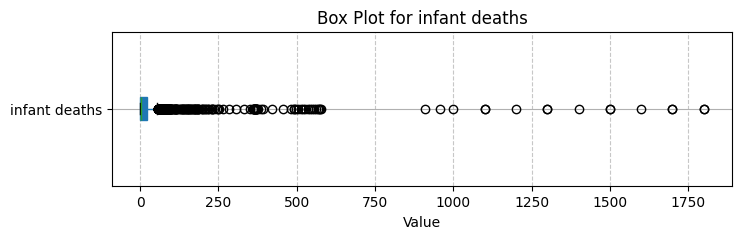

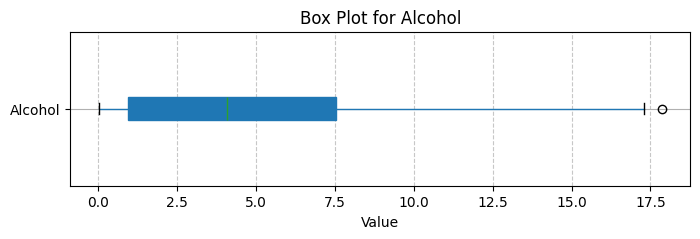

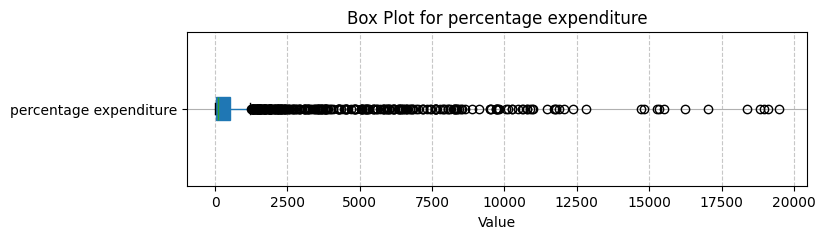

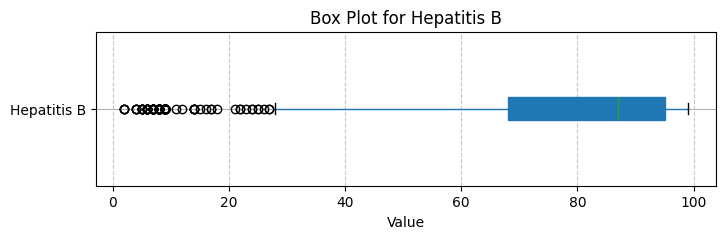

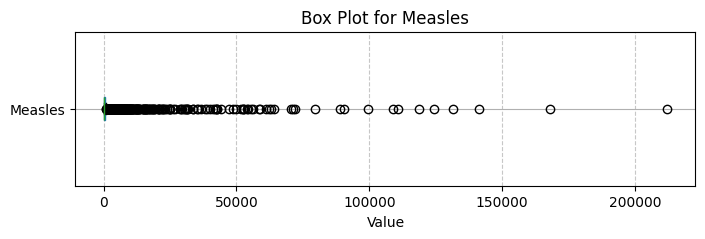

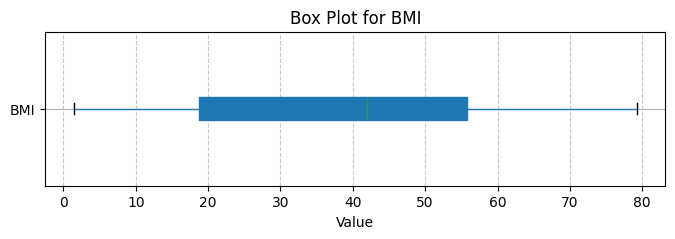

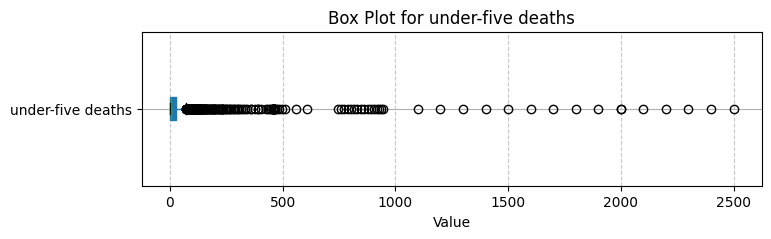

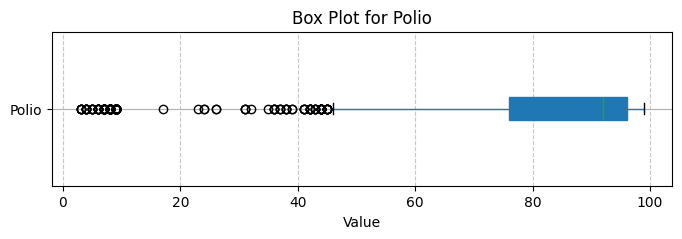

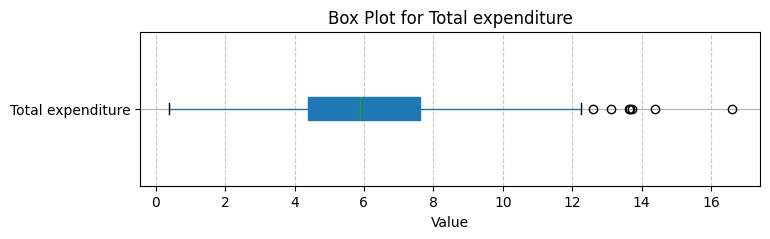

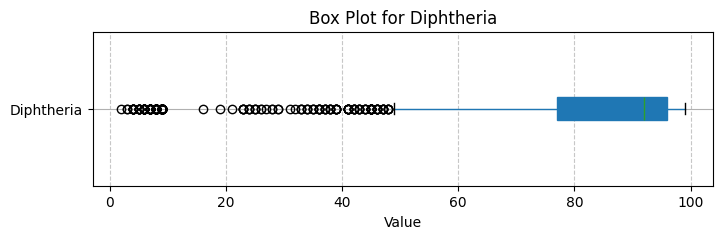

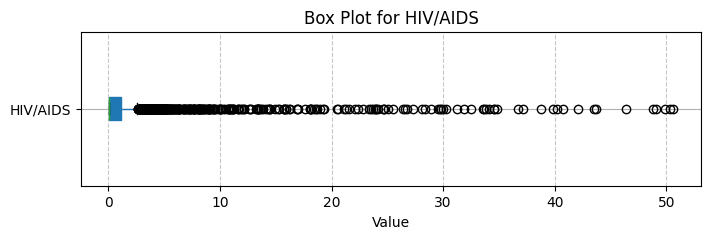

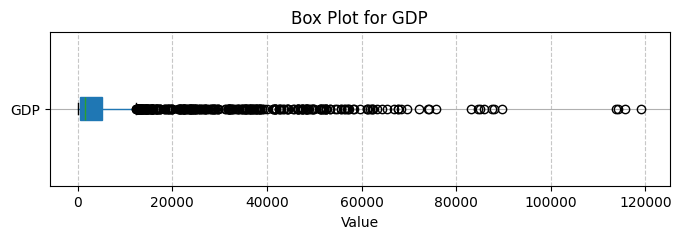

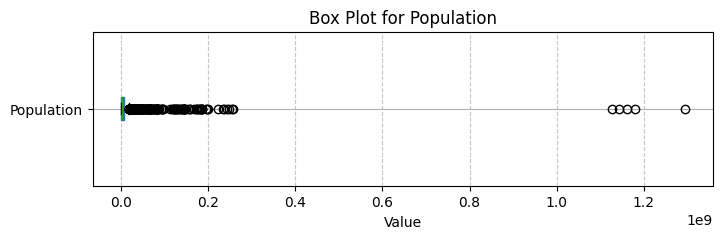

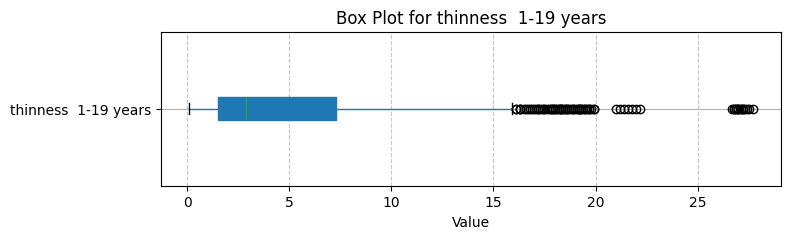

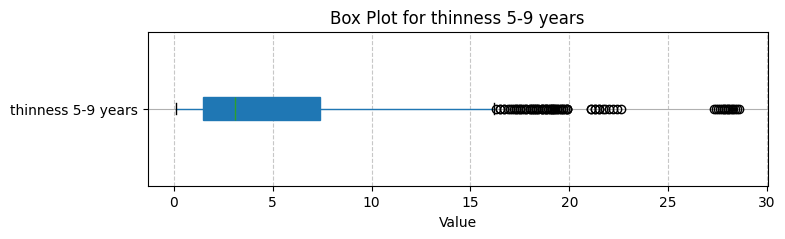

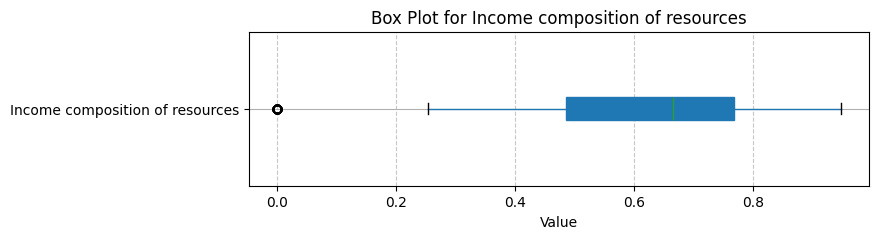

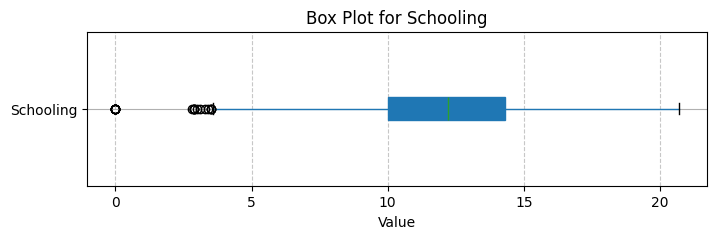

In [23]:
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = df1.select_dtypes(include=['number']).columns

# Create horizontal boxplots separately for each column
for col in num_cols:
    plt.figure(figsize=(8, 2))
    df1.boxplot(column=col, vert=False, patch_artist=True)
    plt.title(f"Box Plot for {col}")
    plt.xlabel("Value")
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()


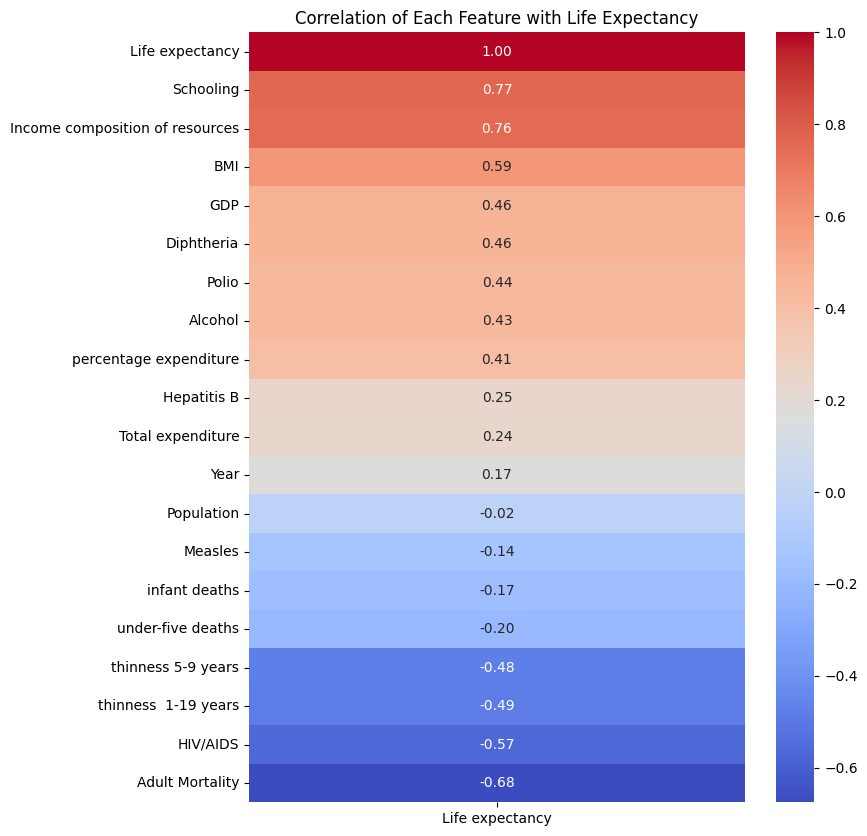

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = df1.select_dtypes(include=['number'])

# Compute correlation with Life expectancy
corr = num_cols.corr()['Life expectancy'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Each Feature with Life Expectancy")
plt.show()


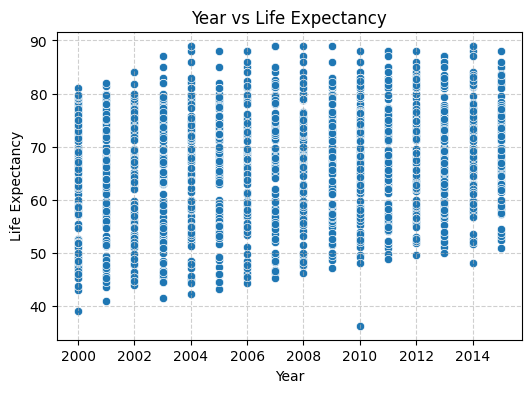

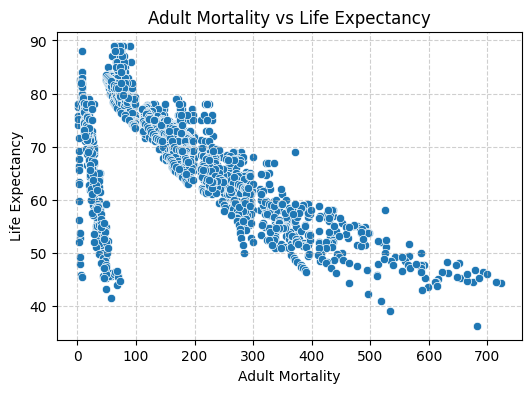

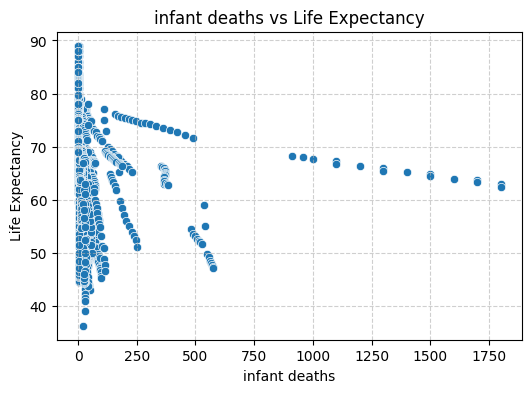

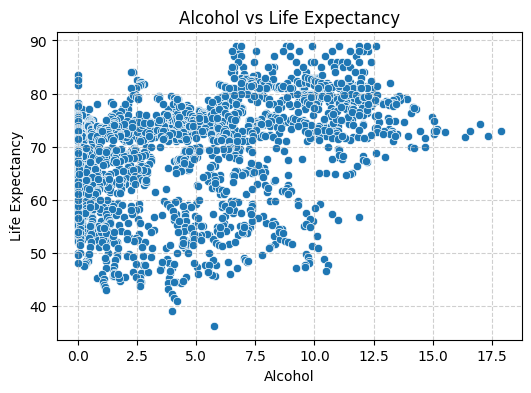

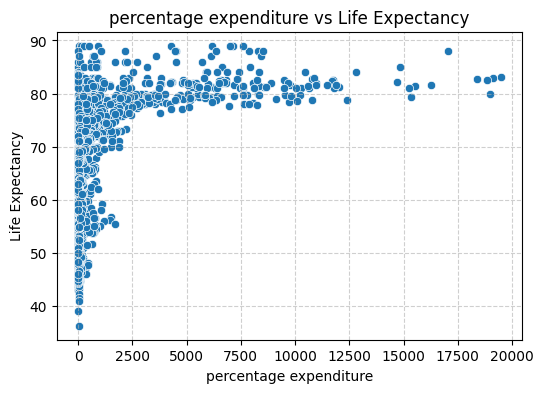

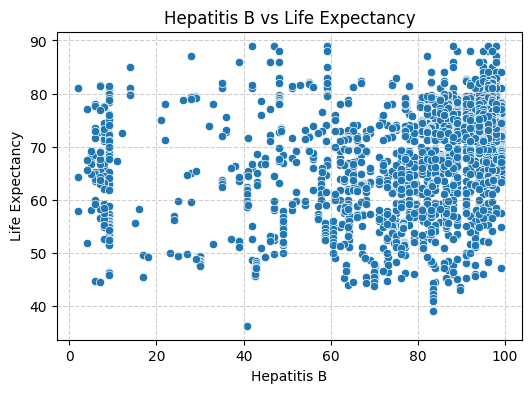

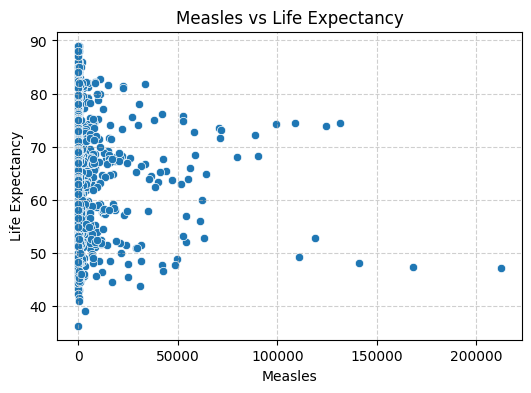

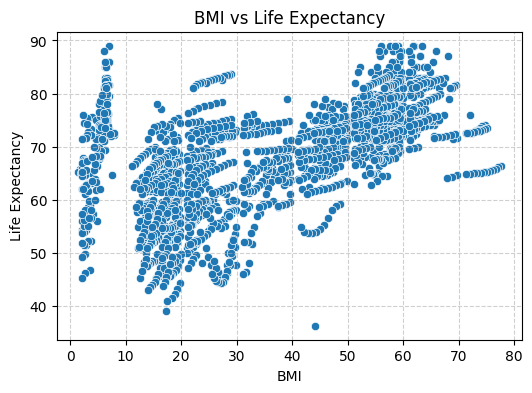

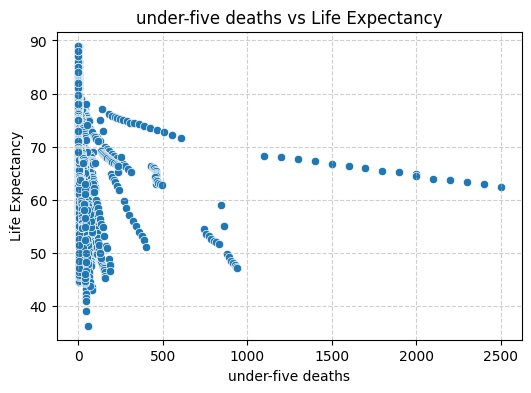

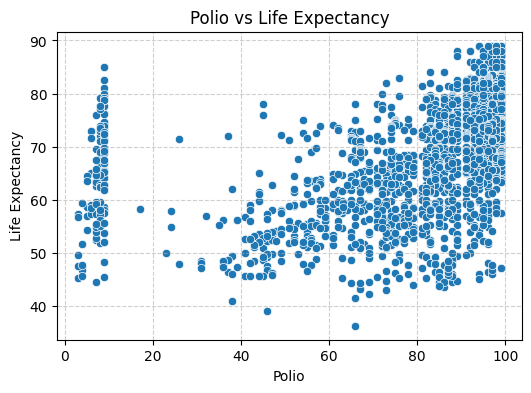

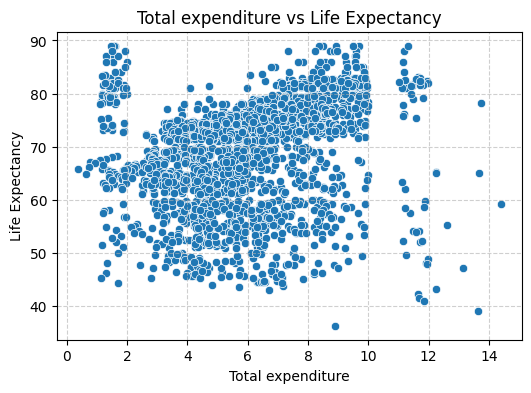

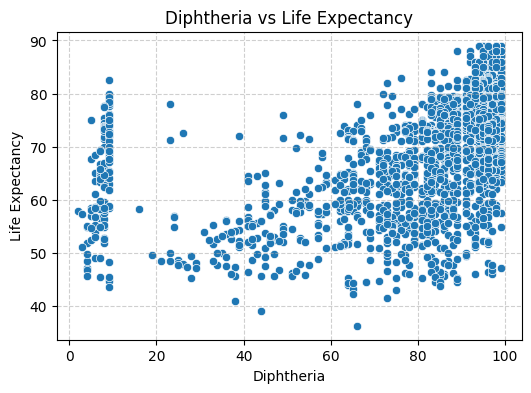

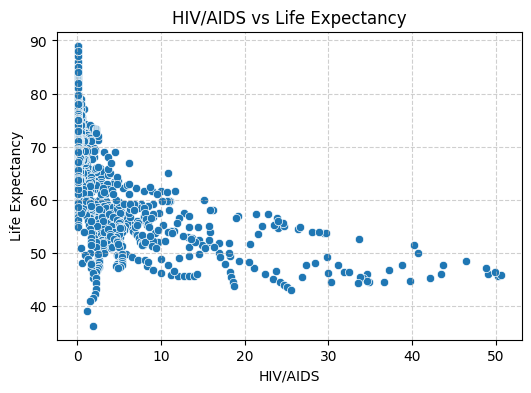

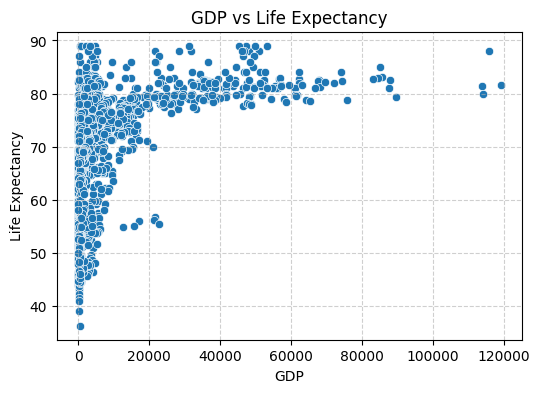

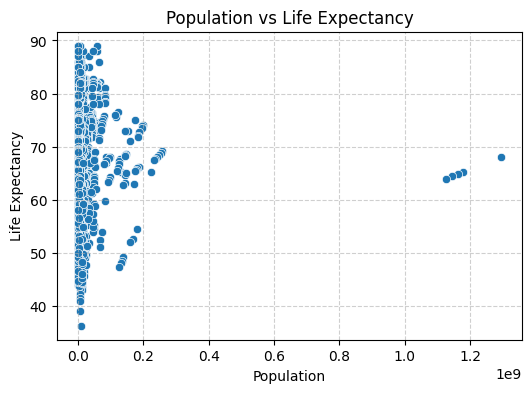

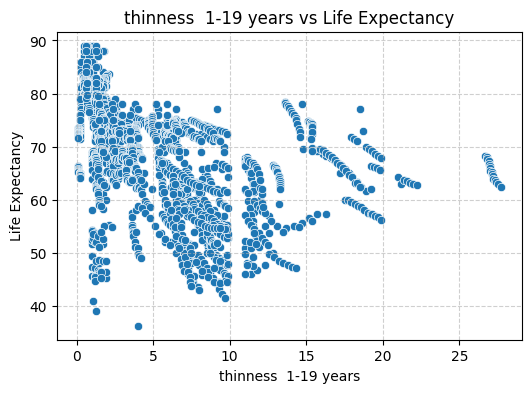

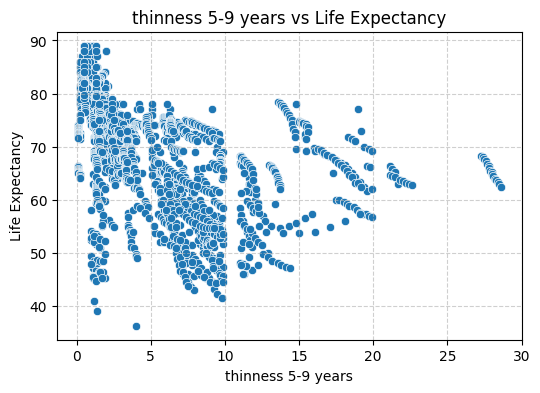

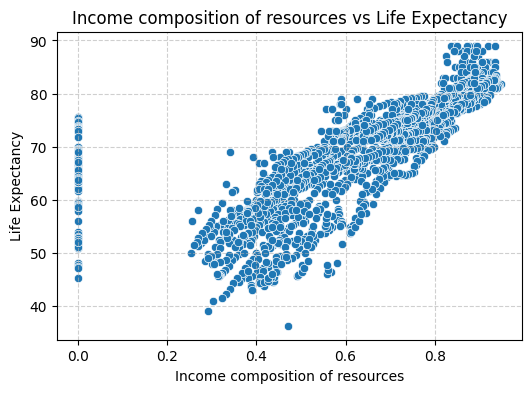

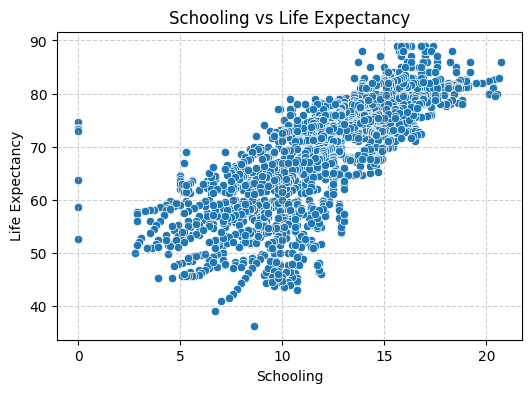

In [25]:
num_cols = df1.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('Life expectancy', errors='ignore')

# Plot scatter plots for each numeric column vs life expectancy
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df1[col], y=df1['Life expectancy'])
    plt.title(f"{col} vs Life Expectancy")
    plt.xlabel(col)
    plt.ylabel("Life Expectancy")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


In [26]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw


wisker(df1['GDP'])



(np.float64(-6705.528472000001), np.float64(12329.8511792))

In [27]:
import numpy as np

# Columns to treat
cols_to_treat = ['GDP', 'thinness  1-19 years', 'thinness 5-9 years']

for col in cols_to_treat:
    # Compute Q1, Q3, and IQR
    q1, q3 = np.percentile(df1[col].dropna(), [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr

    # Cap values outside the whiskers
    df1[col] = np.where(df1[col] < lw, lw, df1[col])
    df1[col] = np.where(df1[col] > uw, uw, df1[col])

    print(f"{col} - lower cap: {lw}, upper cap: {uw}")

print("Outlier treatment done for selected columns.")


GDP - lower cap: -6705.528472000001, upper cap: 12329.8511792
thinness  1-19 years - lower cap: -7.199999999999999, upper cap: 16.0
thinness 5-9 years - lower cap: -7.350000000000001, upper cap: 16.25
Outlier treatment done for selected columns.


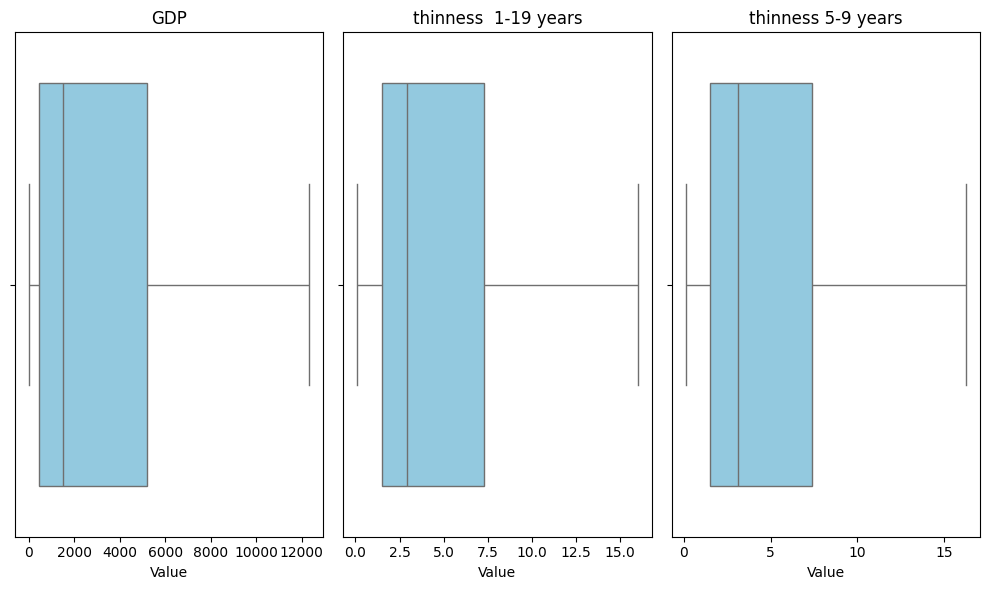

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_plot = ['GDP', 'thinness  1-19 years', 'thinness 5-9 years']

plt.figure(figsize=(10, 6))

# Plot each column separately
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df1[col], orient='h', color='skyblue')
    plt.title(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()


In [29]:
df2 = pd.get_dummies(df1, columns=['Country','Status'], drop_first=True)
df2.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,False,False,False,False,False,False,False,False,False,True
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,False,False,False,False,False,False,False,False,False,True


In [30]:
df2 = df2.dropna(subset=['Adult Mortality'])
df2 = df2.dropna(subset=['Life expectancy'])

df2.isna().sum()

Year                  0
Life expectancy       0
Adult Mortality       0
infant deaths         0
Alcohol               0
                     ..
Country_Uzbekistan    0
Country_Vanuatu       0
Country_Zambia        0
Country_Zimbabwe      0
Status_Developing     0
Length: 162, dtype: int64

In [31]:
missing_rows = df2[df2.isna().any(axis=1)]
print(missing_rows)

      Year  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
544   2015             86.0             71.0              0   10.708   
545   2014             84.0             73.0              0    9.640   
546   2013             81.0             75.0              0    9.500   
547   2012             80.0             76.0              0    9.260   
548   2011             79.7             79.0              0   10.470   
...    ...              ...              ...            ...      ...   
1979  2004             81.0             69.0              0   10.550   
1980  2003             85.0             72.0              0   10.820   
1981  2002             84.0             74.0              0   10.850   
1982  2001             82.0             75.0              0   11.120   
1983  2000             79.7             78.0              0   11.260   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
544                 0.000000          NaN        9  58.8

In [32]:
df3 = df2.drop(['Hepatitis B'], axis=1)
df3.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,...,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,...,False,False,False,False,False,False,False,False,False,True


In [33]:
x = df3.drop('Life expectancy', axis=1)
y = df3['Life expectancy']



In [34]:
df3.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,...,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,...,False,False,False,False,False,False,False,False,False,True
1,2014,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,...,False,False,False,False,False,False,False,False,False,True


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [36]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)


0.949516964976982

In [37]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x,y,cv=cv)

array([0.95784348, 0.96058064, 0.93827878, 0.95817268, 0.95863733])

In [38]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/home/kavindu-112491/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+04, tolerance: 1.776e+01
  model = cd_fast.enet_coordinate_descent(
/home/kavindu-112491/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.784e+04, tolerance: 1.704e+01
  model = cd_fast.enet_coordinate_descent(
/home/kavindu-112491/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

,model,best_score,best_params
0,linear_regression,0.954703,{'fit_intercept': True}
1,lasso,0.827130,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.938652,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [39]:
import numpy as np

def predict_life_expectancy(year, adult_mortality, infant_deaths, alcohol, 
                            percentage_expenditure, measles, bmi, under_five_deaths, 
                            polio, country, status):
    x = np.zeros(len(X.columns))

    # Assign numeric values to their positions (adjust column order as per your dataset)
    x[np.where(X.columns == 'Year')[0][0]] = year
    x[np.where(X.columns == 'Adult Mortality')[0][0]] = adult_mortality
    x[np.where(X.columns == 'infant deaths')[0][0]] = infant_deaths
    x[np.where(X.columns == 'Alcohol')[0][0]] = alcohol
    x[np.where(X.columns == 'percentage expenditure')[0][0]] = percentage_expenditure
    x[np.where(X.columns == 'Measles')[0][0]] = measles
    x[np.where(X.columns == 'BMI')[0][0]] = bmi
    x[np.where(X.columns == 'under-five deaths')[0][0]] = under_five_deaths
    x[np.where(X.columns == 'Polio')[0][0]] = polio

    # One-hot encode categorical columns
    country_col = f'Country_{country}'
    status_col = f'Status_{status}'
    
    if country_col in X.columns:
        x[np.where(X.columns == country_col)[0][0]] = 1
    if status_col in X.columns:
        x[np.where(X.columns == status_col)[0][0]] = 1

    # Predict
    return lr_clf.predict([x])[0]


In [41]:
import json
import pickle

#  Save the trained model
with open('life_expectancy_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

# Save the exact feature names and categorical values
columns = {
    "data_columns": list(x.columns),  # exact training columns, keep same order
    "countries": df1['Country'].dropna().unique().tolist(),
    "status": df1['Status'].dropna().unique().tolist()
}

with open("country_status.json", "w") as f:
    json.dump(columns, f, indent=4)

print(" Saved model and column info to country_status.json")


 Saved model and column info to country_status.json


NameError: name 'X' is not defined